# Naive Bayes Classification
 

Naive Bayes Classification 은 모든 특성 값이 서로 독립임을 가정하여, 특성들 사이에서의 발생할 수 있는 연관성을 배제하고 각각의 특성이 분류할 대상에 대해 독립적으로 기여할 수 있도록 한다. 베이즈 정리와 조건부 확률을 이용하여 다음과 같이 사후 확률 (Posterior)에 대하여 사전 확률 (Prior) 과 우도 (Likelihood) 로 표현할 수 있다. 

* \\( \hat{y} = \text{argmax}_y p(y | X) \\)  
* \\( p(y|X) = \frac{p( \mathbf{X} | y) p(y)}{p(\mathbf{X})} \\)  
    * 사전 확률 (Prior Probability) : \\( p(y) \\)
    * 우도 (Likelihood Probability) : \\( p(X | y) =  \prod_i p(x_i | y) p(y) \;  \\)   
    * 사후 확률 (Posterior Probability) : \\( p(y | X)  \\)
    
(Naive Bayes Classifier : https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

#### < 예제 > Naive Bayes Classification 을 이용한 Spam filter

* 조건

    * 스팸 필터링을 위한 Naive Bayes model 의 독립 변수 (V)
        * V = ”secret”, ”offer”, ”low”, ”price”, ”valued”, ”customer”, ”today”, ”dollar”, ”million”, ”sports”, ”is”, ”for”, ”play”, ”healthy”, ”pizza”

    * 주어진 학습 데이터 (스팸 메시지 3개, 정상 메시지 4개)
        * 스팸 메시지 = ”million dollar offer”, ”secret offer today”, ”secret is secret”
        * 정상 메시지 = ”low price for valued customer”, ”play secret sports today”, ”sports is healthy”, ”low price pizza”


*  Naive Bayes model 과 학습 데이터로 제공된 메시지를 이용하여 각각의 확률을 계산
    * P(secret|spam) := Nd(secret,spam) / Nd(spam) = 2/3
    * P(spam) = ?
    * P(sports|non-spam) = ? 
    * P(dollar|spam) = ?
    * P(“sports is healthy”|spam) = ? 
    * P(“sports is healthy”|non-spam) = ?
    * P(spam|“sports is healthy”) = ? 
    * P(non-spam|“sports is healthy”) = ? 


* 학습된 Naive Bayes model 을 이용하여 스팸 메시지와 정상 메시지를 구분하는 코드 구현
    * \\( p(y|X) = \frac{p( \mathbf{X} | y) p(y)}{p(\mathbf{X})} \\)
    * matplotlib 라이브러리를 이용하여 visualization
      
 


In [1]:
import numpy as np

In [2]:
# Naive bayes model

V = ["secret", "offer", "low", "price", "valued", "customer", "today", "dollar", "million", "sports", "is", "for", "play", "healthy", "pizza"]

In [3]:
# 단어 별 인덱스 추가

v_idx_mapping = {}
for i, word in enumerate(V):
    v_idx_mapping[word] = i


In [4]:
v_idx_mapping

{'secret': 0,
 'offer': 1,
 'low': 2,
 'price': 3,
 'valued': 4,
 'customer': 5,
 'today': 6,
 'dollar': 7,
 'million': 8,
 'sports': 9,
 'is': 10,
 'for': 11,
 'play': 12,
 'healthy': 13,
 'pizza': 14}

In [5]:
# 주어진 학습 데이터 
# 스팸 메시지 : spam_msgs
# 정상 메시지 : ham_msgs 

spam_msgs = ["million dollar offer", "secret offer today", "secret is secret"]
ham_msgs = ["low price for valued customer offer", "play secret sports today", "sports is healthy", "low price pizza"]

In [6]:
table = np.zeros([2, len(V)])

# 주어진 메시지를 단어 단위로 구분
# 중복 단어 제거 

spam_list = [ set(spam_msg.split(' ')) for spam_msg in spam_msgs ]
ham_list = [ set(ham_msg.split(' ')) for ham_msg in ham_msgs ]

In [7]:
# 스팸 메시지와 정상 메시지를 구성하는 단어의 수를 계산하여 Table 에 입력
# 스팸 : [0, :] / 정상 : [1, :]

for i, word in enumerate(V):
    for spam_msg in spam_list:
        table[0][i] += word in spam_msg
    
    for ham_msg in ham_list:
        table[1][i] += word in ham_msg

In [8]:
# y label : 스팸 메시지, 정상 메시지
# X data : Naive Bayes model (V)
# tabel : 학습 데이터로부터 계산한 스팸 메시지와 정상 메시지의 단어 수

table

array([[2., 2., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.],
       [1., 1., 2., 2., 1., 1., 1., 0., 0., 2., 1., 1., 1., 1., 1.]])

In [9]:
# num_spam : 스팸 메시지 수
# num_ham : 정상 메시지 수
# num_total : 총 메시지 수

num_spam = len(spam_msgs)
num_ham = len(ham_msgs)
num_total = num_ham + num_spam


# P(spam), P(ham) 

p_spam = num_spam / num_total # 3/7
p_ham = num_ham / num_total # 4/7

In [10]:
# 사전 확률 (pior) 

p_xi_y = table / np.array([num_spam, num_ham]).reshape(2, 1)
p_y = np.array([num_spam, num_ham]) / num_total

print('P(y) : \n', p_y)
print('\nP(Xi) : \n', p_xi_y)

P(y) : 
 [0.42857143 0.57142857]

P(Xi) : 
 [[0.66666667 0.66666667 0.         0.         0.         0.
  0.33333333 0.33333333 0.33333333 0.         0.33333333 0.
  0.         0.         0.        ]
 [0.25       0.25       0.5        0.5        0.25       0.25
  0.25       0.         0.         0.5        0.25       0.25
  0.25       0.25       0.25      ]]


In [11]:
# P(secret|spam) = Nd(secret, spam) / Nd(spam) = 2/3
print('P(secret|spam): ', table[0][v_idx_mapping['secret']]/num_spam)
print('P(spam): ', p_spam)

p_xi_ham = table[1][v_idx_mapping['sports']]/num_ham
p_xi_spam = table[0][v_idx_mapping['dollar']]/num_spam
print('P(sports|non-spam): ', p_xi_ham)
print('P(dollar|spam): ', p_xi_spam)

P(secret|spam):  0.6666666666666666
P(spam):  0.42857142857142855
P(sports|non-spam):  0.5
P(dollar|spam):  0.3333333333333333


In [12]:
p_x_spam = table[0][v_idx_mapping['sports']]/num_spam \
        * table[0][v_idx_mapping['is']]/num_spam \
        * table[0][v_idx_mapping['healthy']]/num_spam

p_x_ham = table[1][v_idx_mapping['sports']]/num_ham \
        * table[1][v_idx_mapping['is']]/num_ham \
        * table[1][v_idx_mapping['healthy']]/num_ham

print('P("sports is healthy"|spam): ', p_x_spam)
print('P("sports is healthy"|non-spam): ', p_x_ham)


P("sports is healthy"|spam):  0.0
P("sports is healthy"|non-spam):  0.03125


In [13]:
p_spam_x = (p_x_spam * p_spam) / ( (p_x_spam * p_spam) + (p_x_ham * p_ham) )
p_ham_x = (p_x_ham * p_ham)  / ( (p_x_spam * p_spam) + (p_x_ham * p_ham) )

print('P(spam|"sports is healthy"): ', p_spam_x)
print('P(non-spam|"sports is healthy"): ', p_ham_x)

P(spam|"sports is healthy"):  0.0
P(non-spam|"sports is healthy"):  1.0


* (풀이)

    * \\( P(secret|spam) = \frac{N_d(secret)}{N_d(spam)} = \frac{2}{3}  \\)  

    * \\( P(spam) = \frac{N_d(spam)}{N_d(spam) + N_d(ham)} = \frac{3}{3 + 4} = \frac{3}{7} \\)

    * \\( P(sports|ham) = \frac{N_d(sports)}{N_d(ham)} = \frac{2}{4}  \\)

    * \\( P(dollar|spam) = \frac{N_d(dollar)}{N_d(spam)} = \frac{1}{3}  \\)

    * \\( P(sports\; is\; healthy|spam) = P(sports|spam) \cdot P(is|spam)\cdot P(healthy|spam)
    = \frac{0}{3} \cdot \frac{1}{3} \cdot \frac{0}{3} = 0 \\)

    * \\( P(sports\; is\; healthy|ham) = P(sports|ham) \cdot P(is|ham)\cdot P(healthy|ham)
    = \frac{2}{4} \cdot \frac{1}{4} \cdot \frac{1}{4} = \frac{1}{32} \\)
    
    * \\( P(spam|sports\; is\; healthy) = \frac{P(sports\; is\; healthy|spam) \cdot P(spam)}{P(sports\; is\; healthy|spam) \cdot P(spam)) + (P(sports\; is\; healthy|ham) \cdot P(ham)} = \frac{0\cdot \frac{3}{7}}{0\cdot \frac{3}{7} +  \frac{1}{32}\cdot \frac{4}{7} }  =  0\\)

    * \\( P(ham|sports\; is\; healthy) = \frac{P(sports\; is\; healthy|ham) \cdot P(ham)}{P(sports\; is\; healthy|spam) \cdot P(spam)) + (P(sports\; is\; healthy|ham) \cdot P(ham)} = \frac{ \frac{1}{32}  \cdot \frac{4}{7}}{0\cdot \frac{3}{7} +  \frac{1}{32}\cdot \frac{4}{7} }  = 1 \\)



In [14]:
import matplotlib.pyplot as plt

In [15]:
def naive_bayes_classifier(test_msg, laplace_smoothing = False):

    print('input message : ', test_msg)
    
    # 주어진 메시지를 단어 단위로 구분하고 카운트 (중복 제거)
    test_list = set(test_msg.split(' '))
    table_test = np.zeros(len(V))

    # 입력 메시지에서 사용된 단어 0 또는 1로 표시
    for i, word in enumerate(V):
        table_test[i] += word in test_list
        
    # likelihood
    tmp = p_xi_y[:, np.where(table_test == 1)].reshape(2, -1)
    print('P(Xi|y): \n', tmp)  
    
    if laplace_smoothing == True:
        tmp += 0.000001
    
    p_x_y = np.transpose(tmp).prod(0)
    print('P(X|Spam): ', p_x_y[0])
    print('P(X|Ham): ', p_x_y[1])
    
    # Posterior = likelihood x pior
    p_y_x = p_x_y * p_y
    p_y_x /= p_y_x.sum()
    print('P(Spam|X): ', p_y_x[0])
    print('P(Ham|X): ', p_y_x[1])
    
    if p_y_x[0] == 0.5:
        print("cannot decide")
    else:
        if list(p_y_x).index(max(p_y_x)) == 0:
            print("Spam message")
        else:
            print("Ham message")
    
    # visualize
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.bar(list(["spam", "ham"]), p_y_x)
    plt.title('Naive Bayes')
    plt.show
    
    return p_y_x

    

input message :  sports is healthy
P(Xi|y): 
 [[0.         0.33333333 0.        ]
 [0.5        0.25       0.25      ]]
P(X|Spam):  0.0
P(X|Ham):  0.03125
P(Spam|X):  0.0
P(Ham|X):  1.0
Ham message


array([0., 1.])

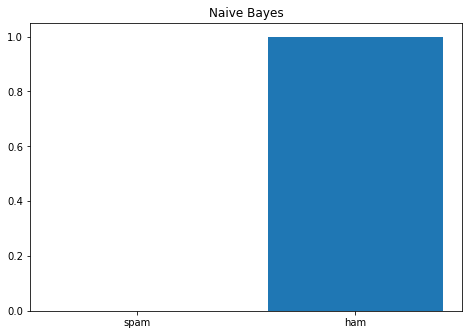

In [16]:
# 정상 메시지 확인
naive_bayes_classifier("sports is healthy")

input message :  secret is secret
P(Xi|y): 
 [[0.66666667 0.33333333]
 [0.25       0.25      ]]
P(X|Spam):  0.2222222222222222
P(X|Ham):  0.0625
P(Spam|X):  0.7272727272727274
P(Ham|X):  0.27272727272727276
Spam message


array([0.72727273, 0.27272727])

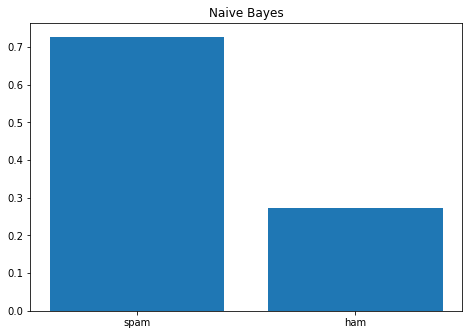

In [17]:
# 스팸 메시지 확인
naive_bayes_classifier("secret is secret")

input message :  is
P(Xi|y): 
 [[0.33333333]
 [0.25      ]]
P(X|Spam):  0.3333333333333333
P(X|Ham):  0.25
P(Spam|X):  0.5
P(Ham|X):  0.5
cannot decide


array([0.5, 0.5])

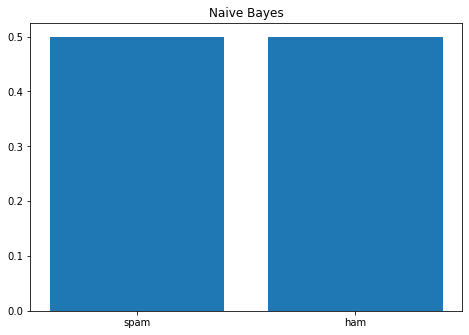

In [18]:
naive_bayes_classifier("is")

In [19]:

# 예외 상황

table = np.zeros([2, len(V)])


spam_msgs = ["secret is secret"]
ham_msgs = ["low price for valued customer offer"]

spam_list = [ set(spam_msg.split(' ')) for spam_msg in spam_msgs ]
ham_list = [ set(ham_msg.split(' ')) for ham_msg in ham_msgs ]

for i, word in enumerate(V):
    for spam_msg in spam_list:
        table[0][i] += word in spam_msg
    
    for ham_msg in ham_list:
        table[1][i] += word in ham_msg

num_spam = len(spam_msgs)
num_ham = len(ham_msgs)
num_total = num_ham + num_spam

p_spam = num_spam / num_total
p_ham = num_ham / num_total

p_xi_y = table / np.array([num_spam, num_ham]).reshape(2, 1)
p_y = np.array([num_spam, num_ham]) / num_total

print(p_xi_y)




[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [20]:
# 정상 메시지 확인
naive_bayes_classifier("sports is healthy")

input message :  sports is healthy
P(Xi|y): 
 [[0. 1. 0.]
 [0. 0. 0.]]
P(X|Spam):  0.0
P(X|Ham):  0.0
P(Spam|X):  nan
P(Ham|X):  nan


/Users/chongkeunpaik/.pyenv/versions/anaconda3-5.2.0/envs/aita/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


ValueError: nan is not in list

input message :  sports is healthy
P(Xi|y): 
 [[0. 1. 0.]
 [0. 0. 0.]]
P(X|Spam):  1.0000009999999997e-12
P(X|Ham):  9.999999999999999e-19
P(Spam|X):  0.999999000002
P(Ham|X):  9.999980000040002e-07
Spam message


array([9.99999e-01, 9.99998e-07])

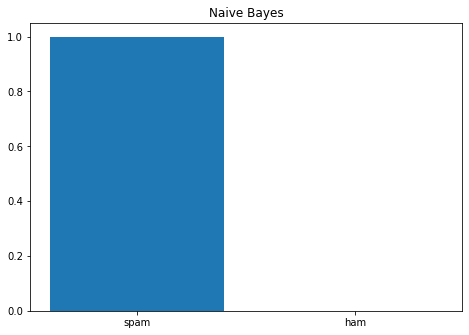

In [21]:
# practical naive bayes : laplace smoothing 적용
naive_bayes_classifier("sports is healthy", laplace_smoothing = True)
